c:\Users\jhpark\anaconda3\envs\arima\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jhpark\anaconda3\envs\arima\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] done processing
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] done processing


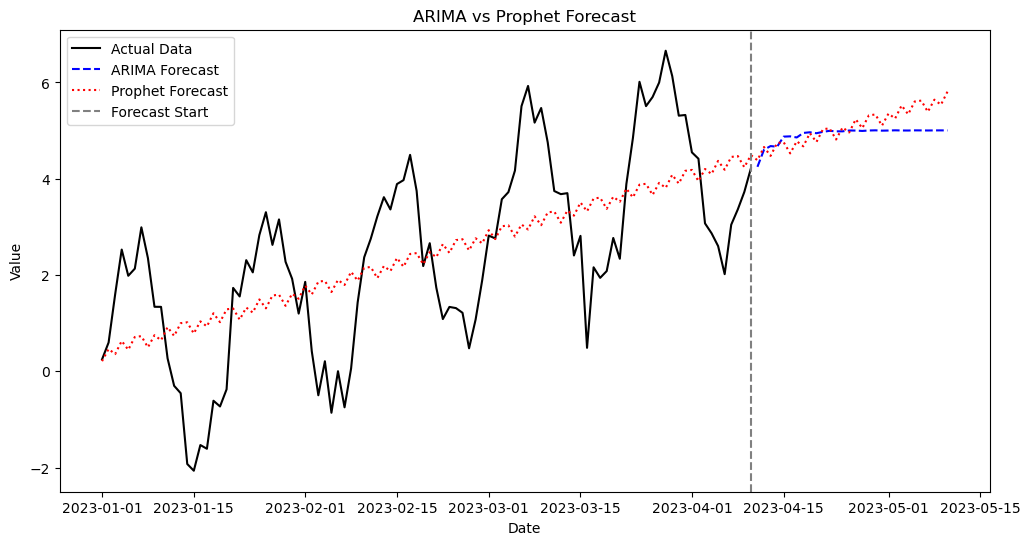

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet  # Prophet이 설치되어 있어야 함

# 1. 랜덤한 시계열 데이터 생성 (트렌드와 계절성을 포함)
np.random.seed(42)
time = np.arange(100)
trend = 0.05 * time  # 선형 트렌드
seasonality = 2 * np.sin(2 * np.pi * time / 20)  # 주기성 (20일 주기)
noise = np.random.normal(scale=0.5, size=100)  # 랜덤 노이즈
data = trend + seasonality + noise

# 시계열 데이터프레임 생성
df = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=100, freq='D'), 'y': data})

# 2. ARIMA 모델 학습 및 예측
arima_model = ARIMA(df['y'], order=(5, 1, 2))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=30)  # 30일 예측

# 3. Prophet 모델 학습 및 예측
df = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=100, freq='D'), 'y': data})
df['y'] = df['y'].values.flatten()  # Prophet에 맞게 1D 배열로 변환

# Prophet 모델 학습
prophet_model = Prophet()
prophet_model.fit(df)
prophet_model = Prophet()
prophet_model.fit(df)
future = prophet_model.make_future_dataframe(periods=30)
prophet_forecast = prophet_model.predict(future)

# 4. 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Actual Data', color='black')
plt.plot(df['ds'].iloc[-1] + pd.to_timedelta(np.arange(1, 31), unit='D'), arima_forecast, label='ARIMA Forecast', linestyle='dashed', color='blue')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Forecast', linestyle='dotted', color='red')
plt.axvline(df['ds'].iloc[-1], color='gray', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('ARIMA vs Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()
